# <strong>R 데이터 시각화 (Visualization)
<br>
## <strong>1 ggplot2 Basic
그래프 그리기
### <strong>01 산점도 (변수 간 관계를 표현)
<strong>Scatter Plot

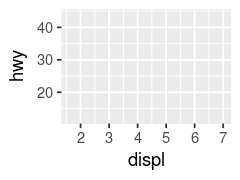

In [4]:
library(ggplot2)               # qplot 라이브러리
options(repr.plot.width=2, repr.plot.height=1.5)
# X축 displ, Y축 hwy로 지정해 배경 생성
ggplot(data = mpg, aes(x = displ, y = hwy))        

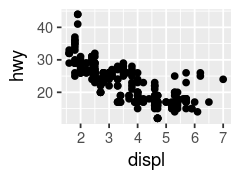

In [5]:
# 배경에 산점도 추가
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point()  

Warning message:
“Removed 105 rows containing missing values (geom_point).”

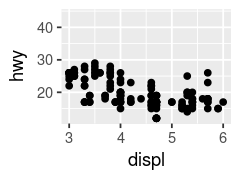

In [6]:
# x축 범위 3~6으로 지정
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + xlim(3, 6)

Warning message:
“Removed 105 rows containing missing values (geom_point).”

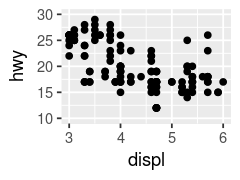

In [4]:
# x축 범위 3~6, y축 범위 10~30으로 지정
ggplot(data = mpg, aes(x = displ, y = hwy)) + 
  geom_point() + 
  xlim(3, 6) + 
  ylim(10, 30)

<br>
### <strong>02 막대 그래프 (집단 간 차이를 표현)
<strong>Bar Chart

In [3]:
library(dplyr)
df_mpg <- mpg %>% 
          group_by(drv) %>%
          summarise(mean_hwy = mean(hwy)); df_mpg

ERROR: Error in eval(lhs, parent, parent): 객체 'mpg'를 찾을 수 없습니다


ERROR: Error in eval(expr, envir, enclos): 객체 'df_mpg'를 찾을 수 없습니다


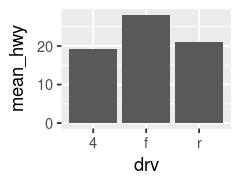

In [6]:
ggplot(data = df_mpg, aes(x = drv, y = mean_hwy)) + geom_col()

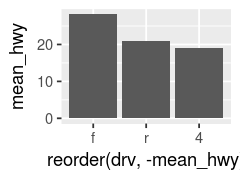

In [7]:
ggplot(data = df_mpg, aes(x = reorder(drv, -mean_hwy), y = mean_hwy)) + geom_col()

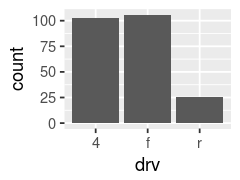

In [8]:
ggplot(data = mpg, aes(x = drv)) + geom_bar()

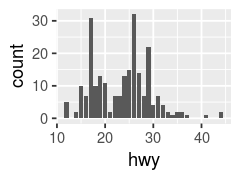

In [9]:
ggplot(data = mpg, aes(x = hwy)) + geom_bar()

<br>
### <strong>03 선 그래프 (시간에 따라 달라지는 데이터 표현)
<strong>Line Chart

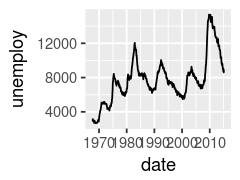

In [10]:
ggplot(data = economics, aes(x = date, y = unemploy)) + geom_line()

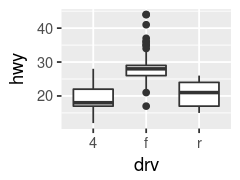

In [11]:
ggplot(data = mpg, aes(x = drv, y = hwy)) + geom_boxplot()

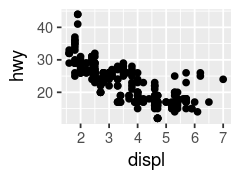

In [12]:
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point()  ## 1.산점도

Warning message:
“Removed 105 rows containing missing values (geom_point).”

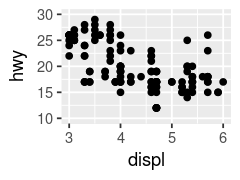

In [13]:
# 축 설정 추가
ggplot(data = mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  xlim(3, 6) +
  ylim(10, 30)

<br>
### <strong>04 막대 그래프 
<strong>평균 막대 그래프

In [14]:
# 1단계.평균표 만들기
df_mpg <- mpg %>%
          group_by(drv) %>%
          summarise(mean_hwy = mean(hwy))

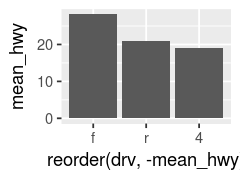

In [15]:
# 2단계.그래프 생성하기, 크기순 정렬하기
ggplot(data = df_mpg, aes(x = reorder(drv, -mean_hwy), y = mean_hwy)) + geom_col()

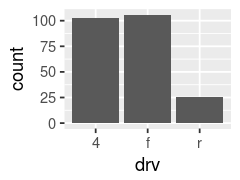

In [16]:
# 3.빈도 막대 그래프
ggplot(data = mpg, aes(x = drv)) + geom_bar()

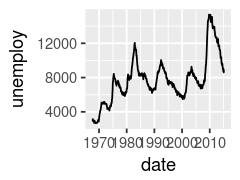

In [17]:
# 4.선 그래프
ggplot(data = economics, aes(x = date, y = unemploy)) + geom_line()

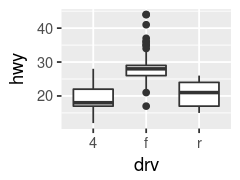

In [18]:
# 5.상자 그림
ggplot(data = mpg, aes(x = drv, y = hwy)) + geom_boxplot()

<br>
## <strong>2 Text Mining
### <strong> 01 Text 데이터의 빈도수 계산하기
Words Count

In [ ]:
# https://stackoverflow.com/questions/46236364/linux-error-loading-rjava-in-rstudio-libjvm-so-missing
# whereis java
# nano source ~/.profile  (내용추가)
# export LD_LIBRARY_PATH=/usr/lib/jvm/java-8-oracle/lib/amd64:/usr/lib/jvm/java-8-oracle/jre/lib/amd64/server
# $ R CMD javareconf

# 패키지 설치
# install.packages("rJava")
# install.packages("memoise")
# install.packages("KoNLP")

In [19]:
# 패키지 로드
library(KoNLP)
library(dplyr)
useNIADic()
extractNoun("대한민국의 영토는 한반도와 그 부속도서로 한다")  # 문장에서 Noun(명사) 요소만 추출

Checking user defined dictionary!



Backup was just finished!
983012 words dictionary was built.


[1] "대한민국" "영토"     "한반도"   "부속도서" "한"

In [20]:
# 데이터 불러오기
getwd()
setwd('/home/markbaum/Python/Source/R/data'); getwd()
txt <- readLines("hiphop2.txt")
head(txt)

[1] "/home/markbaum/Python/Source/R"

[1] "/home/markbaum/Python/Source/R/data"

[1] "\"보고 싶다"                  "이렇게 말하니까 더 보고 싶다"
[3] "너희 사진을 보고 있어도"      "보고 싶다"                   
[5] "너무 야속한 시간"             "나는 우리가 밉다"

In [21]:
library(stringr)                                             # String R (이모티콘 등의 "특수문자"를 빈칸으로 수정)
txt       <- str_replace_all(txt, "\\W", " ")                # 특수문제 제거
nouns     <- extractNoun(txt)                                # 가사에서 명사추출
wordcount <- table(unlist(nouns))                            # 추출한 명사 list를 문자열 벡터로 변환 (단어별 빈도표)
df_word   <- as.data.frame(wordcount, stringsAsFactors = F)  # data.frame으로 변환
df_word   <- rename(df_word, word = Var1, freq = Freq)       # data.frame 변수명 바꾸기 (컬럼명 X)
df_word   <- filter(df_word, nchar(word) >= 2)               # 두 글자 이상으로 구성된 단어만을 대상 (dply R)
top_20    <- df_word %>%                                     # 빈도로 정렬이 완료된 data.frame 을
                  arrange(desc(freq)) %>%                    # freq 컬럼을 기준 내림차순 정렬
                  head(10)                                   # 상위 20열만 추출
top_20

word,freq
you,89
my,86
YAH,80
on,76
하나,75
오늘,51
사랑,49
and,49
우리,48
like,48


### <strong> 02 Word Cloud 만들기
Text 데이터의 빈도수 계산하기 (Words Count)

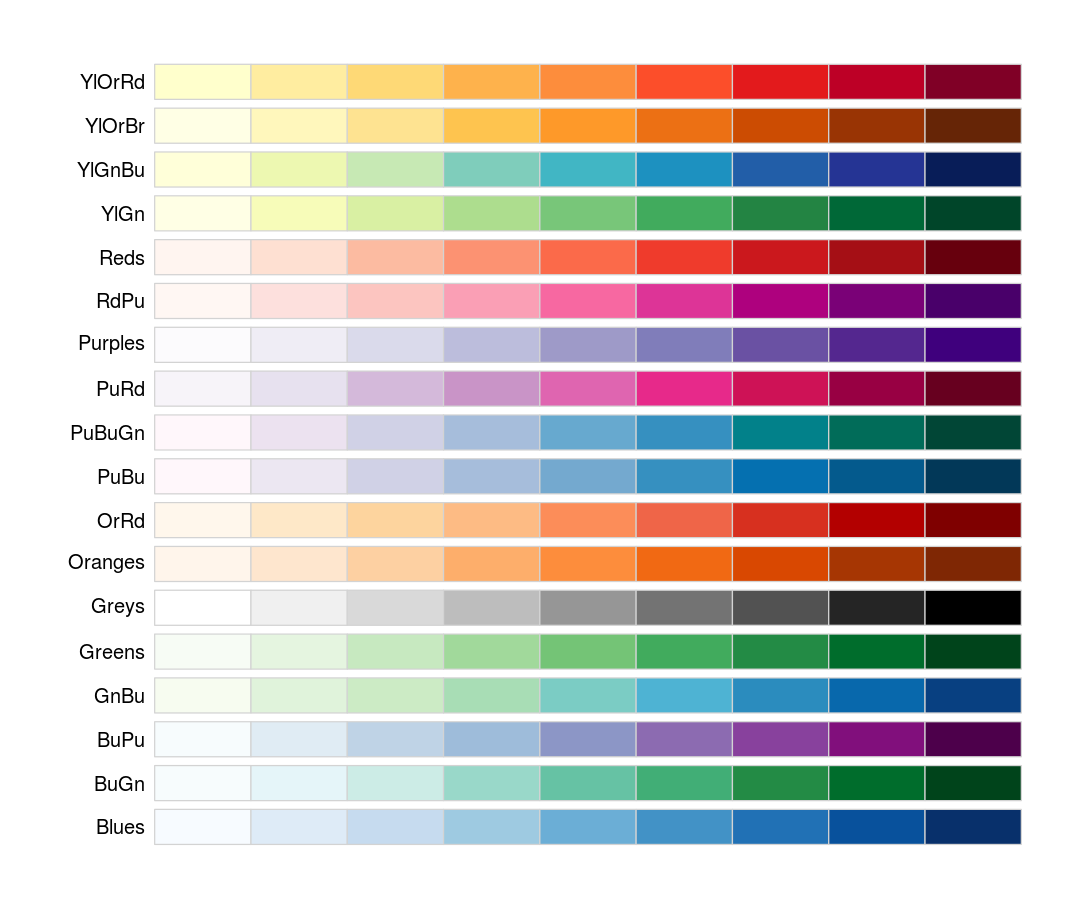

In [22]:
library(ggplot2)                                 # qplot 라이브러리
options(repr.plot.width=9, repr.plot.height=7.5) # 출력 Image 크기를 설정
#?wordcloud

# http://earlglynn.github.io/RNotes/package/RColorBrewer/index.html
library(RColorBrewer)
par(mar=c(1,5,1,1))
display.brewer.all(type="seq")

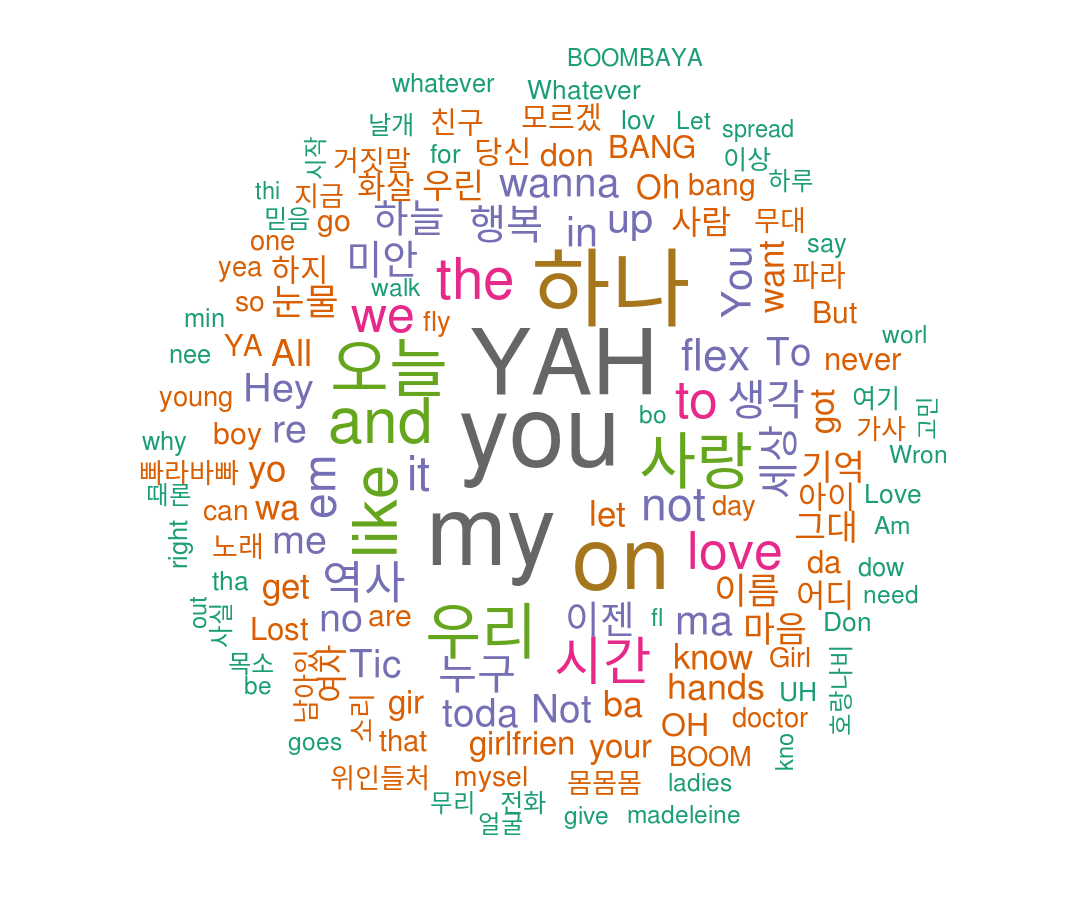

In [23]:
##### install.packages("wordcloud")  # 패키지 설치
library(wordcloud)                   # 패키지 로드 
library(RColorBrewer)
set.seed(1234)                       # 난수를 고정 (동일한 모양의 결과물 출력)
pal <- brewer.pal(8, "Dark2")        # RColorBrewer 패키지의 Dark2 팔렛트에서 8개 색상 추출
wordcloud(words = df_word$word,      # 단어
          freq  = df_word$freq,      # 빈도
          min.freq     = 2,          # 최소 단어 빈도
          max.words    = 150,        # 표현 단어 수
          random.order = F,          # 고빈도 단어 중앙 배치
          rot.per      = .1,         # 90도를 회전시킬 단어의 비율 (전체중 임의의 10%)
          scale        = c(5, .8),   # (최대빈도의 텍스트 크기비율 (500%차이), 공간의 여백비율(80%를 활용)
          colors       = pal)        # 색상 파레트 목록

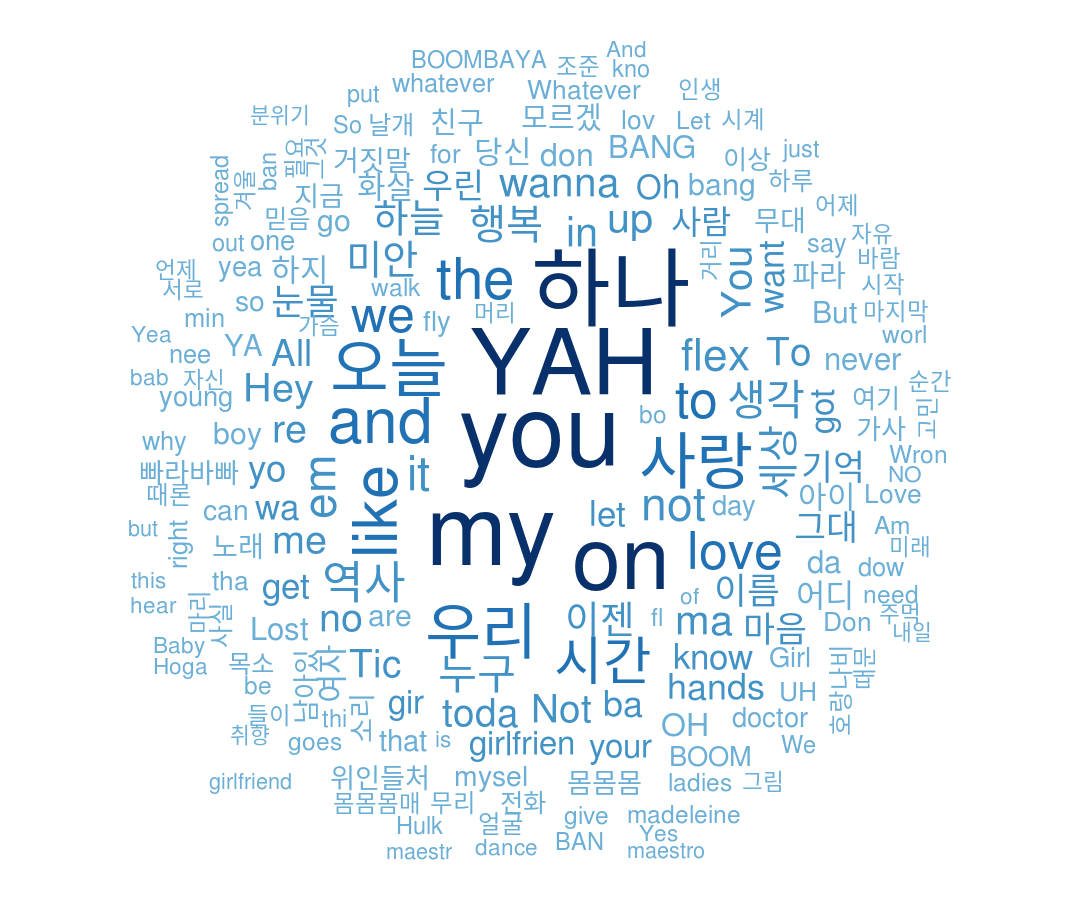

In [24]:
set.seed(1234)                     # 난수 고정
pal <- brewer.pal(9,"Blues")[5:9]      # 색상 목록 생성
wordcloud(words        = df_word$word, # 단어
          freq         = df_word$freq, # 빈도
          min.freq     = 2,            # 최소 단어 빈도
          max.words    = 200,          # 표현 단어 수
          random.order = F,            # 고빈도 단어 중앙 배치
          rot.per      = .1,           # 회전 단어 비율
          scale        = c(5, 0.8),    # 단어 크기 범위
          colors       = pal)          # 색상 목록

<br>
## <strong> 3 Text Mining 2
<strong> 트위터 텍스트 마이닝 (Twitter Text Mining)

In [25]:
twitter <- read.csv("twitter.csv",        # 데이터 불러오기
                     header           = T,
                     stringsAsFactors = F,
                     fileEncoding     = "UTF-8")
head(twitter,3)

X,번호,계정이름,작성일,내용
1,1,ahkorea,11/2/2011,민주당의 ISD관련 주장이 전부 거짓으로 속속 드러나고있다. 미국이 ISD를 장악하고 있다고 주장하지만 중재인 123명 가운데 미국인은 10명뿐이라고 한다.
2,2,parkkeewoo,12/30/2011,"말로만 '미제타도', 사실은 '미제환장'! 김정일 운구차가 링컨 컨티넬탈이던데 북한의 독재자나 우리나라 종북들이나 겉으로는 노동자, 서민을 대변한다면서 고급 외제차, 아이팟에 자식들 미국 유학에 환장하는 위선자들인거죠"
3,3,zndvn33,1/5/2012,한나라당이 보수를 버린다네요 뭔가착각하는모냥인에 국민들이보수를싫어하는게 아니라뻘짓거리하는분들을싫어하는겁니다야당이진보어쩌고저쩌고한다고해서그들을조아한다고생각하면대착각


In [26]:
twitter <- rename(twitter,        # 변수명 수정
                   no   = 번호,
                   id   = 계정이름,
                   date = 작성일,
                   tw   = 내용)
head(twitter$tw, 10)

[1] "민주당의 ISD관련 주장이 전부 거짓으로 속속 드러나고있다. 미국이 ISD를 장악하고 있다고 주장하지만 중재인 123명 가운데 미국인은 10명뿐이라고 한다."                                                                                 
 [2] "말로만 '미제타도', 사실은 '미제환장'! 김정일 운구차가 링컨 컨티넬탈이던데 북한의 독재자나 우리나라 종북들이나 겉으로는 노동자, 서민을 대변한다면서 고급 외제차, 아이팟에 자식들 미국 유학에 환장하는 위선자들인거죠"              
 [3] "한나라당이 보수를 버린다네요\n뭔가착각하는모냥인에 국민들이보수를싫어하는게 아니라뻘짓거리하는분들을싫어하는겁니다야당이진보어쩌고저쩌고한다고해서그들을조아한다고생각하면대착각"                                                 
 [4] "FTA를 대하는 현명한 자세! 사실 자유주의 경제의 가장 큰 수해자는 한국이죠. 농어업분야 피해를 줄이는 정부대안을 최대한, 보완하고 일자리 창출 등 실익을 최대화해 나가는게 현실적인 대처자세일듯!"                                    
 [5] "곽노현씨 갈수록 가관입니다. 뇌물질에 아들 병역 의혹까지. 도대체 아이들이 뮐 보고 배우겠습니까? 이래도 자리 연연하시겠습니까?"                                                                                                     
 [6] "과거 집권시 한미FTA를 적극 추진하던 세력이 이제 집권하면 폐기하겠다고 주장합니다. 어이없어 말도 안 나오네요. 표만 얻을 수 있다면 국가 안보나 경제가 어떻게 되든 상관없다는 무책임한 행태들, 우리 정치의 후진성을 드러내는 거죠."  
 [7] "한미 FTA가 발효되면 대한민국은 단일 국가로는 세계 최대 시장인 미국과 시장을 공유하는 아시아 첫 국가가 되는군요. 이게 간단하고, 보통스런 이런 아니지. 대단한 거지."                                                                
 [8] "한미 FTA가 발효되면 대한민국은 단일 국가로는 세계 최대 시장인 미국과 시장을 공유하는 아시아 첫 국가가 된다.^^"                                                                                                                    
 [9] "2012년도 서울시 증등교사 임용고시 경쟁률이 평균 12:1이던데 아는지 곽노현 교육감이 전교조 출신 교사 특채 인사 계획을 재고 요청한다니...규정, 상식도 없이 인사권을 남용 하는걸 보니 2심재판에서 감옥에 갈것로 마음을 굳혔나 봅니다."
[10] "RT @###e0789: RT @###kiSong한미FTA 발효가 코 앞으로 다가와있네요 글로벌 무역허브 국가로 등장한 한국의 도전을 세계가 주시하고 있는 만큼, 우리나라가 하루빨리 큰 결실을 맺을 수 있.."

In [27]:
twitter$tw <- str_replace_all(twitter$tw, "\\W", " ")  # 특수문자 제거
head(twitter$tw, 10)

[1] "민주당의 ISD관련 주장이 전부 거짓으로 속속 드러나고있다  미국이 ISD를 장악하고 있다고 주장하지만 중재인 123명 가운데 미국인은 10명뿐이라고 한다 "                                                                                 
 [2] "말로만  미제타도   사실은  미제환장   김정일 운구차가 링컨 컨티넬탈이던데 북한의 독재자나 우리나라 종북들이나 겉으로는 노동자  서민을 대변한다면서 고급 외제차  아이팟에 자식들 미국 유학에 환장하는 위선자들인거죠"              
 [3] "한나라당이 보수를 버린다네요 뭔가착각하는모냥인에 국민들이보수를싫어하는게 아니라뻘짓거리하는분들을싫어하는겁니다야당이진보어쩌고저쩌고한다고해서그들을조아한다고생각하면대착각"                                                  
 [4] "FTA를 대하는 현명한 자세  사실 자유주의 경제의 가장 큰 수해자는 한국이죠  농어업분야 피해를 줄이는 정부대안을 최대한  보완하고 일자리 창출 등 실익을 최대화해 나가는게 현실적인 대처자세일듯 "                                    
 [5] "곽노현씨 갈수록 가관입니다  뇌물질에 아들 병역 의혹까지  도대체 아이들이 뮐 보고 배우겠습니까  이래도 자리 연연하시겠습니까 "                                                                                                     
 [6] "과거 집권시 한미FTA를 적극 추진하던 세력이 이제 집권하면 폐기하겠다고 주장합니다  어이없어 말도 안 나오네요  표만 얻을 수 있다면 국가 안보나 경제가 어떻게 되든 상관없다는 무책임한 행태들  우리 정치의 후진성을 드러내는 거죠 "  
 [7] "한미 FTA가 발효되면 대한민국은 단일 국가로는 세계 최대 시장인 미국과 시장을 공유하는 아시아 첫 국가가 되는군요  이게 간단하고  보통스런 이런 아니지  대단한 거지 "                                                                
 [8] "한미 FTA가 발효되면 대한민국은 단일 국가로는 세계 최대 시장인 미국과 시장을 공유하는 아시아 첫 국가가 된다   "                                                                                                                    
 [9] "2012년도 서울시 증등교사 임용고시 경쟁률이 평균 12 1이던데 아는지 곽노현 교육감이 전교조 출신 교사 특채 인사 계획을 재고 요청한다니   규정  상식도 없이 인사권을 남용 하는걸 보니 2심재판에서 감옥에 갈것로 마음을 굳혔나 봅니다 "
[10] "RT     e0789  RT     kiSong한미FTA 발효가 코 앞으로 다가와있네요 글로벌 무역허브 국가로 등장한 한국의 도전을 세계가 주시하고 있는 만큼  우리나라가 하루빨리 큰 결실을 맺을 수 있  "

In [28]:
nouns     <- extractNoun(twitter$tw)         # 명사추출
class(nouns)   # 모든 데이터 구조를 포함하는 Array 객체 (335p) - 1줄당 1개의 객체로 저장
head(nouns, 5)

[1] "list"

[[1]]
 [1] "민주"   "당의"   "ISD"    "관련"   "주장"   "거짓"   "미국"   "ISD"   
 [9] "장악하" "주장"   "하지"   "중재인" "123"    "명"     "가운데" "미국인"
[17] "10"     "명"     "한"    

[[2]]
 [1] "말"             "미제"           "타도"           "사실"          
 [5] "미제"           "환장"           "김정일"         "운구차"        
 [9] "링컨"           "컨티넬탈이던데" "북한"           "독재자"        
[13] "우리나라"       "북"             "겉"             "노동자"        
[17] "서민"           "대변"           "고급"           "외제차"        
[21] "아이팟"         "자식"           "들"             "미국"          
[25] "유학"           "환장"           "하"             "위선자들인거"  

[[3]]
[1] "한나라"                                                                                            
[2] "당"                                                                                                
[3] "보수"                                                                                              
[4] "뭔가착각하는모냥인에"                                                                              
[5] "국민들이보수를싫어하는게"                                                                          
[6] "아니라뻘짓거리하는분들을싫어하는겁니다야당이진보어쩌고저쩌고한다고해서그들을조아한다고생각하면대착"

[[4]]
 [1] "FTA"    "현명"   "한"     "자세"   "사실"   "자유"   "주의"   "경제"  
 [9] "수해"   "자"     "한국"   "농어업" "분야"   "피해"   "줄"     "정부"  
[17] "대안"   "보완"   "일자리" "창출"   "등"     "실익"   "최대"   "화해"  
[25] "현실"   "적"     "대처"   "자세"   "듯"    

[[5]]
 [1] "곽노현"         "씨"             "가관"           "뇌물"          
 [5] "질"             "아들"           "병역"           "의혹"          
 [9] "아이들"         "뮐"             "자리"           "연연하시겠습니"

In [29]:
test <- unlist(nouns)  # unlist : List 객체를 character 벡터로 변경
head(test,30)
class(test)

[1] "민주"           "당의"           "ISD"            "관련"          
 [5] "주장"           "거짓"           "미국"           "ISD"           
 [9] "장악하"         "주장"           "하지"           "중재인"        
[13] "123"            "명"             "가운데"         "미국인"        
[17] "10"             "명"             "한"             "말"            
[21] "미제"           "타도"           "사실"           "미제"          
[25] "환장"           "김정일"         "운구차"         "링컨"          
[29] "컨티넬탈이던데" "북한"

[1] "character"

In [31]:
wordcount <- table(unlist(nouns))      # '명사 list'를 'charactor 벡터로 변환 후 단어별 빈도표 생성
head(wordcount,15)
class(wordcount)                       # table 객체 : table() 함수 결과


            ^ㄲ             ^ㄹ          ^ㅈ^ㄹ      ^ㅈ^ㄹ해도             ^ㅋ 
              1               1               4               1              16 
      ^ㅋ^ㅋ^ㅋ    ^ㅋ^ㅋ^ㅋ^ㅋ ^ㅋ^ㅋ^ㅋ^ㅋ^ㅋ     ^ㅋ^ㅋ^ㅋRT      ^ㅋ^ㅋ그중 
              4               4               3               1               2 
 ^ㅋ^ㅋ종북좌빨             ^ㅎ       ^ㅎ^ㄷ^ㄷ          ^ㅎ^ㅎ       ^ㅎ^ㅎ^ㅎ 
              1              16               1               2               3 

[1] "table"

In [32]:
df_word   <- as.data.frame(wordcount, stringsAsFactors = F)      # table 객체를 data.frame으로 변환
df_word   <- rename(df_word,                                     # 변수명 수정
                    word = Var1,
                    freq = Freq)
head(df_word, 3)

word,freq
^ㄲ,1
^ㄹ,1
^ㅈ^ㄹ,4


In [33]:
# dplyR로 필터링
df_word <- filter(df_word, nchar(word) >= 2) # 두 글자 이상 단어만 추출
top20   <- df_word %>%
              arrange(desc(freq)) %>%
              head(10)    # 상위 20개 추출
head(top20, 10)

word,freq
북한,2216
대한민국,804
우리,779
좌파,641
국민,550
들이,428
세력,409
친북,385
김정일,342
단체,335


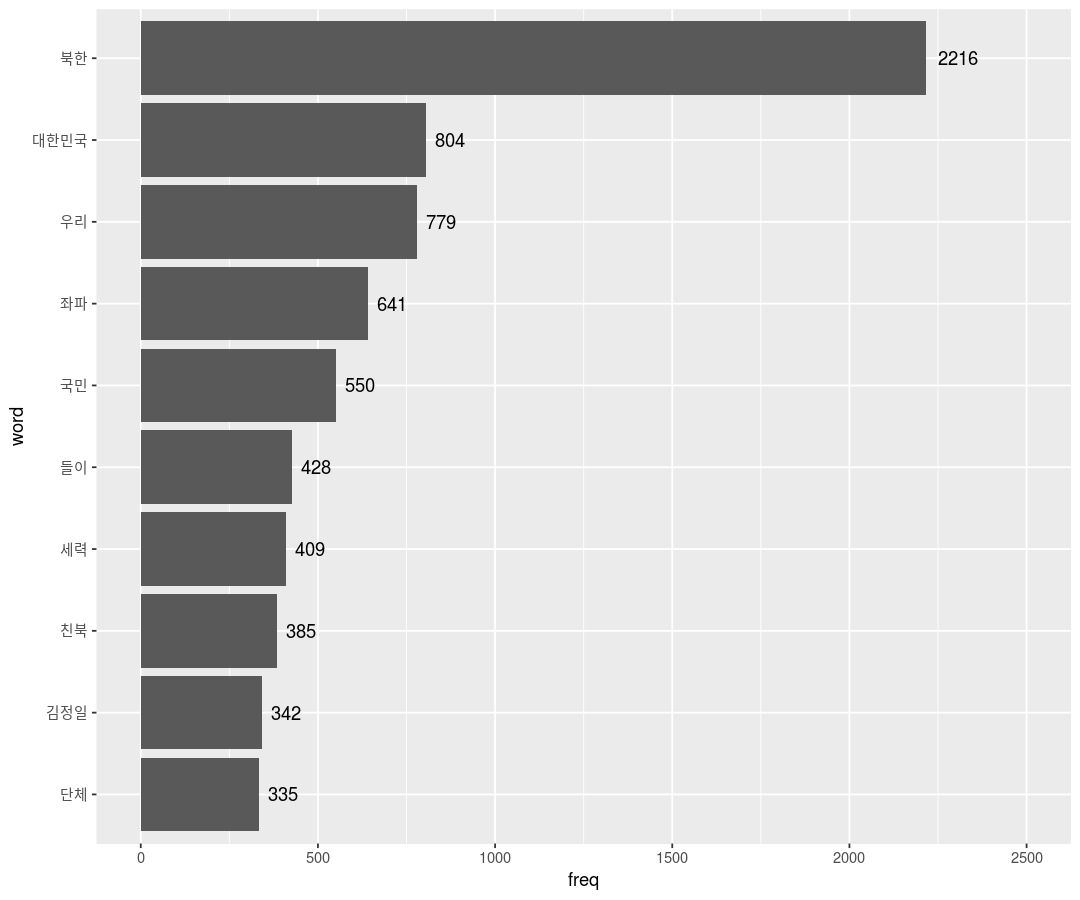

In [34]:
library(ggplot2)
order <- arrange(top20, freq)$word                    # 빈도 순서 변수 생성
ggplot(data = top20, aes(x = word, y = freq)) 
        + ylim(0, 2500)
        + geom_col()
        + coord_flip() 
        + scale_x_discrete(limit = order)              # 빈도 순서 변수 기준 막대 정렬
        + geom_text(aes(label = freq), hjust = -0.3)   # 빈도 표시

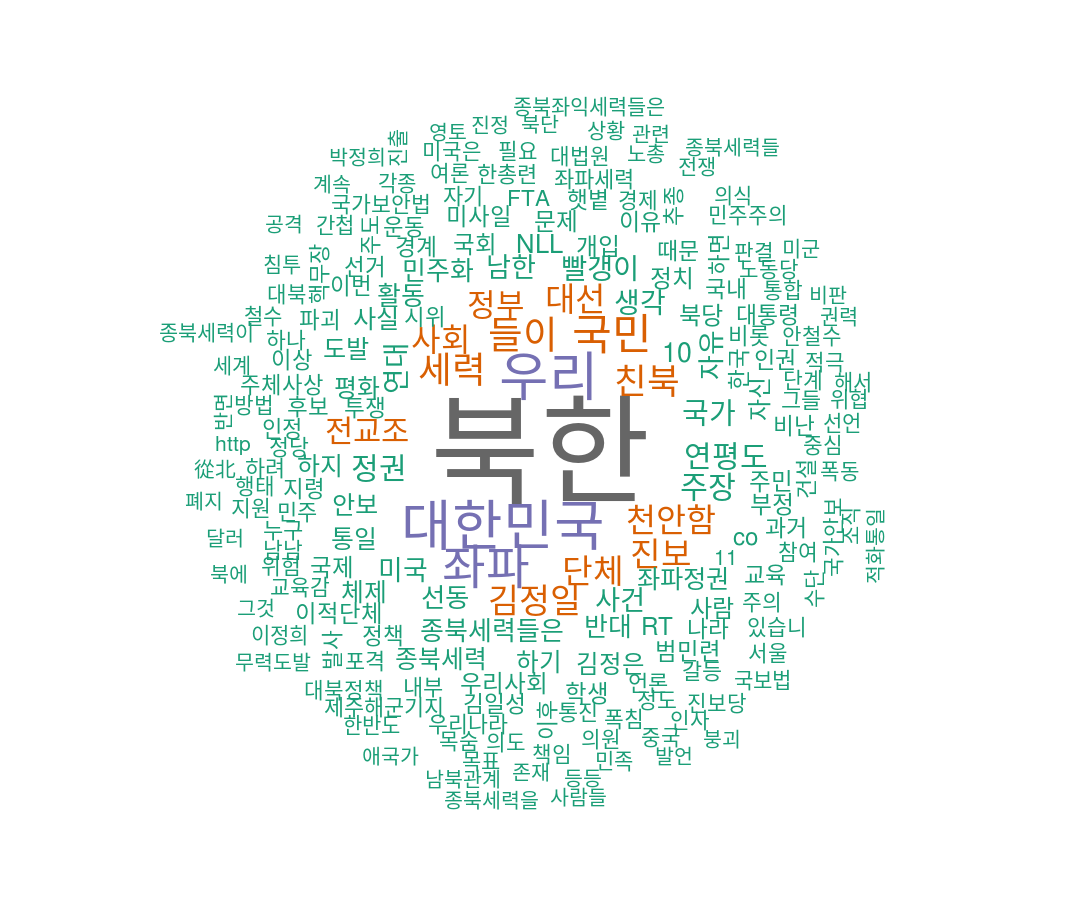

In [35]:
pal <- brewer.pal(8,"Dark2")            # 색상 목록 생성
set.seed(1234)                          # 난수 고정
wordcloud(words        = df_word$word,  # 단어
          freq         = df_word$freq,  # 빈도
          min.freq     = 10,            # 최소 단어 빈도
          max.words    = 200,           # 표현 단어 수
          random.order = F,             # 고빈도 단어 중앙 배치
          rot.per      = .1,            # 회전 단어 비율
          scale        = c(6, 0.9),     # 단어 크기 범위
          colors       = pal)           # 색상 목록

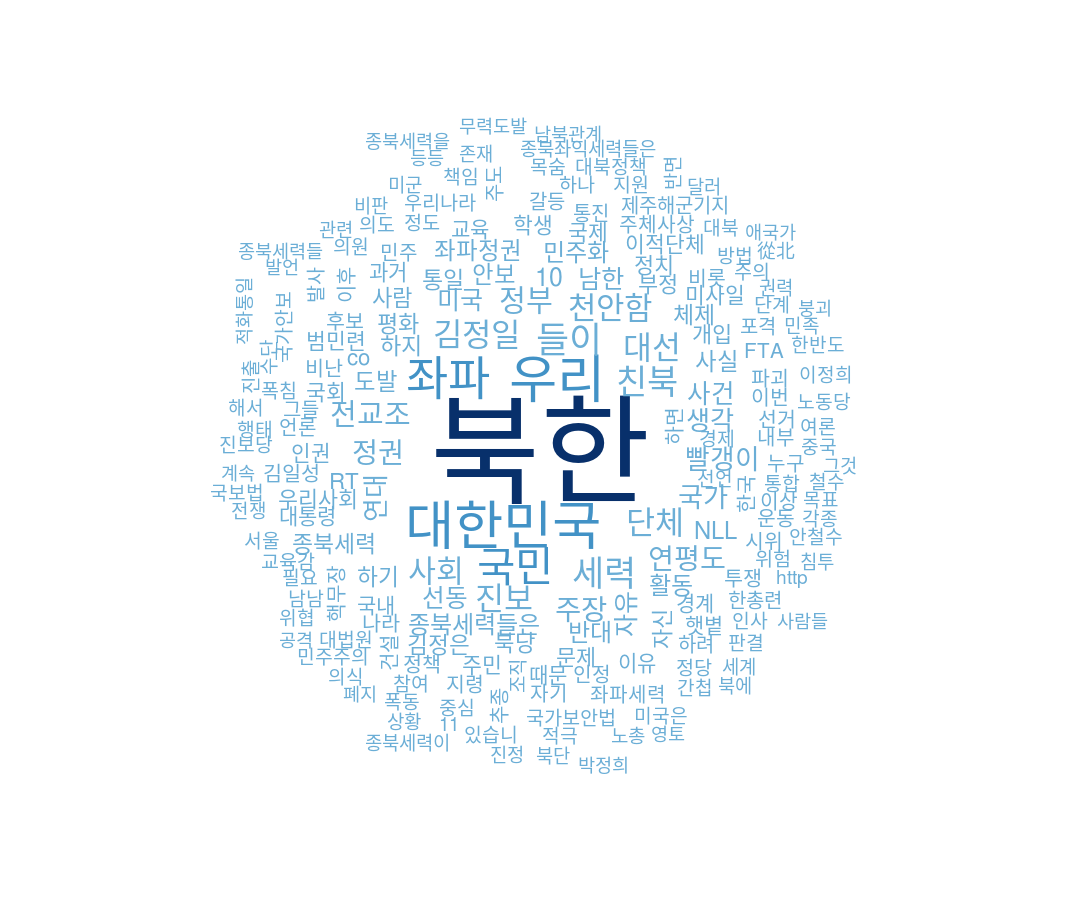

In [36]:
pal <- brewer.pal(9,"Blues")[5:9]      # 색상 목록 생성
set.seed(1234)                         # 난수 고정
wordcloud(words        = df_word$word, # 단어
          freq         = df_word$freq, # 빈도
          min.freq     = 10,           # 최소 단어 빈도
          max.words    = 200,          # 표현 단어 수
          random.order = F,            # 고빈도 단어 중앙 배치
          rot.per      = .1,           # 회전 단어 비율
          scale        = c(6, 0.8),    # 단어 크기 범위
          colors       = pal)          # 색상 목록

<br>
## <strong>3 Geo Mapping
### <strong> 01 미국 주별 강력범죄율 단계 구분도
Choropleth Map

In [1]:
#install.packages("ggiraphExtra")
library(ggiraphExtra)
str(USArrests)   # USArrests : 미국의 주별 강력범죄율 정보 테이블 정보
head(USArrests)  

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [2]:
# 지역명이 index 로 흩어져 있어서 이를 column으로 묶을 필요가 있다
# rownames_to_column() 함수를 사용하기 위한 'tibble'라이브러리 호출
library(tibble)                  
crime <- rownames_to_column(USArrests, var = "state") # index 이름들을 해당 data.frame의 state 컬럼에 담는다
crime$state <- tolower(crime$state)                   # 모든 string을 '소문자'로 변경한다
str(crime)                                            # data.frame 의 structure를 확인

'data.frame':	50 obs. of  5 variables:
 $ state   : chr  "alabama" "alaska" "arizona" "arkansas" ...
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


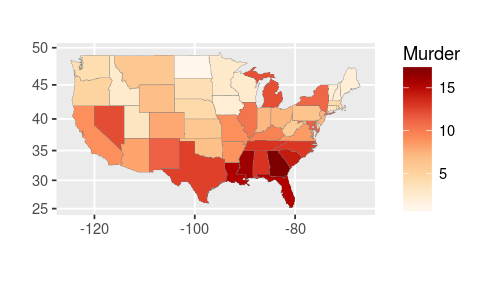

In [5]:
library(ggplot2)                  # 'map_data()' 를 위한 'qqplot2' 라이브러리 호출
options(repr.plot.width=4, repr.plot.height=2.5)

states_map <- map_data("state")
str(states_map)
ggChoropleth(data = crime,         # 지도에 표현할 데이터
             aes(fill   = Murder,  # 색깔로 표현할 변수
                 map_id = state),  # 지역 기준 변수
             map = states_map)     # 지도 데이터

In [6]:
ggChoropleth(data = crime,         # 지도에 표현할 데이터
             aes(fill   = Murder,  # 색깔로 표현할 변수
                 map_id = state),  # 지역 기준 변수
             map = states_map,     # 지도 데이터
             interactive = T)      # 인터랙티브 단계의 구분도를 실행 (여기선 안됨에 유의)

HTML widgets cannot be represented in plain text (need html)

### <strong> 02 대한민국 시도별 인구, 결핵환자 단계 구분도
대한민국 인구통계 지도를 활용한 단계 구분도

In [7]:
#install.packages("stringi")
#install.packages("devtools")
#devtools::install_github("cardiomoon/kormaps2014")
library(kormaps2014)
str(changeCode(korpop1))

In [8]:
library(dplyr)
korpop1 <- rename(korpop1,
                  pop = 총인구_명,
                  name = 행정구역별_읍면동)

str(changeCode(kormap1))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



'data.frame':	8831 obs. of  15 variables:
 $ id       : chr  "0" "0" "0" "0" ...
 $ long     : chr  "137.774352627938" "137.779270931415" "137.780545929866" "137.814504843261" ...
 $ lat      : chr  "50.6883045072662" "50.6899249663447" "50.6900586920365" "50.6937941360883" ...
 $ order    : chr  "1" "2" "3" "4" ...
 $ hole     : chr  "FALSE" "FALSE" "FALSE" "FALSE" ...
 $ piece    : chr  "1" "1" "1" "1" ...
 $ group    : chr  "0.1" "0.1" "0.1" "0.1" ...
 $ SP_ID    : chr  "0" "0" "0" "0" ...
 $ SIDO_CD  : chr  "11" "11" "11" "11" ...
 $ SIDO_NM  : chr  NA NA NA NA ...
 $ BASE_YEAR: chr  "2014" "2014" "2014" "2014" ...
 $ name     : chr  "\xbc\xad\xbf\xefƯ\xba\xb0\xbd\xc3" "\xbc\xad\xbf\xefƯ\xba\xb0\xbd\xc3" "\xbc\xad\xbf\xefƯ\xba\xb0\xbd\xc3" "\xbc\xad\xbf\xefƯ\xba\xb0\xbd\xc3" ...
 $ name1    : chr  NA NA NA NA ...
 $ region   : chr  "11" "11" "11" "11" ...
 $ code     : chr  "11" "11" "11" "11" ...


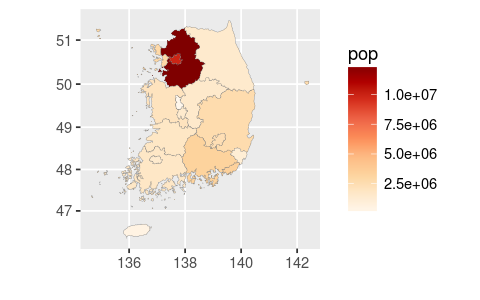

In [10]:
ggChoropleth(data = korpop1,       # 지도에 표현할 데이터
             aes(fill = pop,       # 색깔로 표현할 변수
                 map_id = code,    # 지역 기준 변수
                 tooltip = name),  # 지도 위에 표시할 지역명
             map = kormap1)        # 지도 데이터

'data.frame':	255 obs. of  5 variables:
 $ name1 : chr  "\xb0\xad\xbf\xf8" "\xb0\xe6\xb1\xe2" "\xb0泲" "\xb0\xe6\xba\xcf" ...
 $ code  : chr  "32" "31" "38" "37" ...
 $ name  : chr  "\xb0\xad\xbf\xf8\xb5\xb5" "\xb0\xe6\xb1\u2d75" "\xb0\xe6\xbb󳲵\xb5" "\xb0\xe6\xbb\xf3\xbaϵ\xb5" ...
 $ year  : chr  "2001" "2001" "2001" "2001" ...
 $ NewPts: chr  "1396" "4843" "1749" "2075" ...


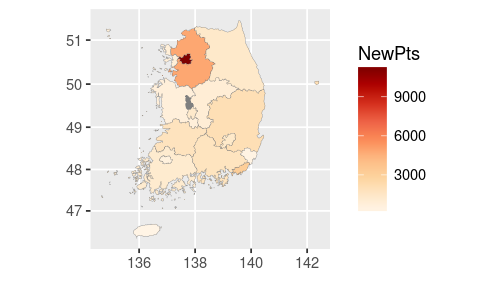

In [11]:
str(changeCode(tbc))
ggChoropleth(data = tbc,           # 지도에 표현할 데이터
             aes(fill = NewPts,    # 색깔로 표현할 변수
                 map_id = code,    # 지역 기준 변수
                 tooltip = name),  # 지도 위에 표시할 지역명
             map = kormap1)        # 지도 데이터

In [9]:
ggChoropleth(data = korpop1,       # 지도에 표현할 데이터
             aes(fill = pop,       # 색깔로 표현할 변수
                 map_id = code,    # 지역 기준 변수
                 tooltip = name),  # 지도 위에 표시할 지역명
             map = kormap1,        # 지도 데이터
           interactive = T)        # 인터랙티브

HTML widgets cannot be represented in plain text (need html)

In [ ]:
str(changeCode(tbc))
ggChoropleth(data = tbc,           # 지도에 표현할 데이터
             aes(fill = NewPts,    # 색깔로 표현할 변수
                 map_id = code,    # 지역 기준 변수
                 tooltip = name),  # 지도 위에 표시할 지역명
             map = kormap1,        # 지도 데이터
             interactive = T)      # 인터랙티브